<a href="https://colab.research.google.com/github/khushijhawar/Face_Lock/blob/main/Face_Lock_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Model

In [ ]:
#mount google drive
#Do not run this

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#upload kaggle.json file

from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [ ]:
#download dataset using api command

!kaggle datasets download -d khushijhawar/face-recognition

 21% 5.00M/23.3M [00:00<00:00, 23.7MB/s]
100% 23.3M/23.3M [00:00<00:00, 77.6MB/s]


In [ ]:
import os
os.mkdir("/content/Data")

!unzip "*.zip" -d "/content/Data"

Archive:  face-recognition.zip
  inflating: /content/Data/Khushi Jhawar/img0.jpg  
  inflating: /content/Data/Khushi Jhawar/img1.jpg  
  inflating: /content/Data/Khushi Jhawar/img10.jpg  
  inflating: /content/Data/Khushi Jhawar/img100.jpg  
  inflating: /content/Data/Khushi Jhawar/img1000.jpg  
  inflating: /content/Data/Khushi Jhawar/img1001.jpg  
  inflating: /content/Data/Khushi Jhawar/img1002.jpg  
  inflating: /content/Data/Khushi Jhawar/img1003.jpg  
  inflating: /content/Data/Khushi Jhawar/img1004.jpg  
  inflating: /content/Data/Khushi Jhawar/img1005.jpg  
  inflating: /content/Data/Khushi Jhawar/img1006.jpg  
  inflating: /content/Data/Khushi Jhawar/img1007.jpg  
  inflating: /content/Data/Khushi Jhawar/img1008.jpg  
  inflating: /content/Data/Khushi Jhawar/img1009.jpg  
  inflating: /content/Data/Khushi Jhawar/img101.jpg  
  inflating: /content/Data/Khushi Jhawar/img1010.jpg  
  inflating: /content/Data/Khushi Jhawar/img1011.jpg  
  inflating: /content/Data/Khushi Jhawar/img

In [ ]:
#import necessary packages

%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")

In [ ]:
tfms = get_transforms()
data = ImageDataBunch.from_folder( Path("/content/Data"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms()).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.068801,0.011857,0.995785,00:40
1,0.031061,0.007006,0.997892,00:39
2,0.014356,0.003930,0.996839,00:39
3,0.006546,0.000654,1.000000,00:39


In [ ]:
#create folder to save the model

my_dir = "/content/drive/My Drive/dl_projects/Face_Lock"
os.makedirs(my_dir ,exist_ok=True)

In [ ]:
#Do not run this cell

learn.save(my_dir + "/Stage1")

In [ ]:
#Do not run this cell model already exported

learn.export(my_dir+"/export.pkl")

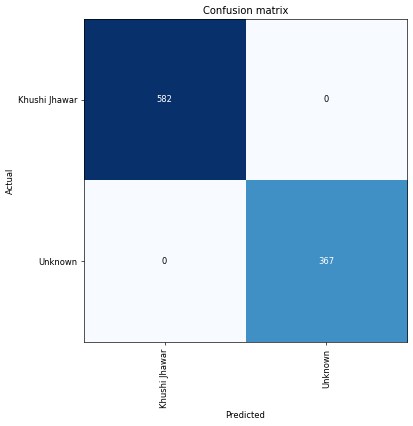

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)